<a href="https://colab.research.google.com/github/ChaelinL/DataAnalysis_Study/blob/main/%EC%9D%B4%EC%B1%84%EB%A6%B007_0409_%EA%B3%BC%EC%A0%9C3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터분석 기초반 6주차 과제3
- mpg, titanic을 이용하여 2x2 3x3 의 시각화를 그려주세요.
- 필수적으로 2차원 2개 이상 그려야 합니다!

**1. mpg 데이터 시각화**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# mpg 데이터 불러오기
from google.colab import drive
drive.mount('/content/drive')

mpg = pd.read_csv('/content/drive/My Drive/mpg.csv')
mpg

Mounted at /content/drive


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


<ipython-input-9-7695ed20afa7>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,0].set_xticklabels(manu_cty.index, rotation=90)
<ipython-input-9-7695ed20afa7>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,1].set_xticklabels(manu_hwy.index, rotation=90)


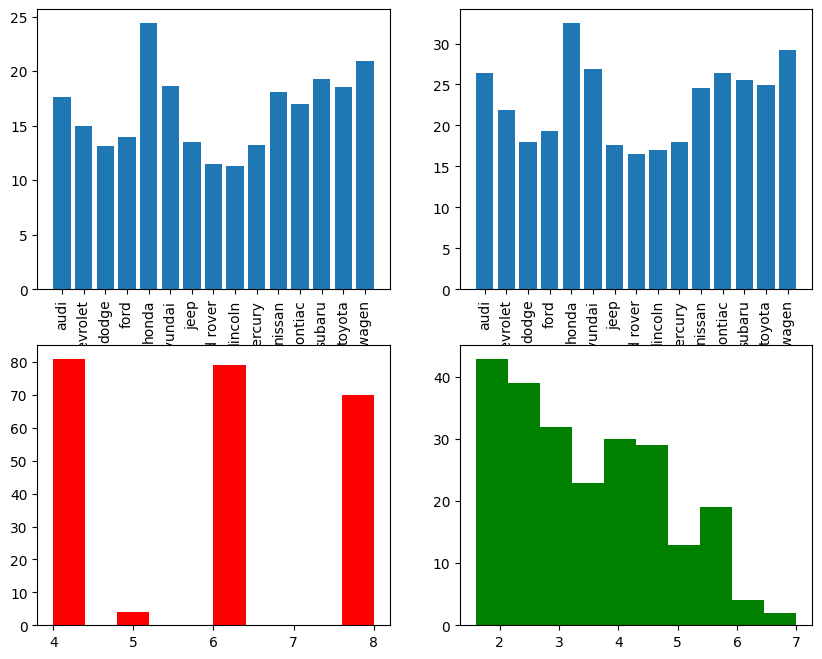

In [9]:
# 제조사별 평균 도시 연비 비교
manu_cty = mpg.groupby('manufacturer').agg(mean_cty=('cty','mean'))

# 제조사별 평균 고속도로 연비 비교
manu_hwy = mpg.groupby('manufacturer').agg(mean_hwy=('hwy','mean'))

# subplot 사용해 그래프 여러 개 그리기
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
ax[0,0].set_xticklabels(manu_cty.index, rotation=90)
ax[0,0].bar(manu_cty.index, manu_cty['mean_cty'])

ax[0,1].set_xticklabels(manu_hwy.index, rotation=90)
ax[0,1].bar(manu_hwy.index, manu_hwy['mean_hwy'])

ax[1,0].hist(mpg['cyl'], facecolor='red')
ax[1,1].hist(mpg['displ'], facecolor='green')

plt.show()

<ipython-input-25-0fb127600497>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,2].set_xticklabels(manu_cty.index, rotation=90)
<ipython-input-25-0fb127600497>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,0].set_xticklabels(manu_hwy.index, rotation=90)


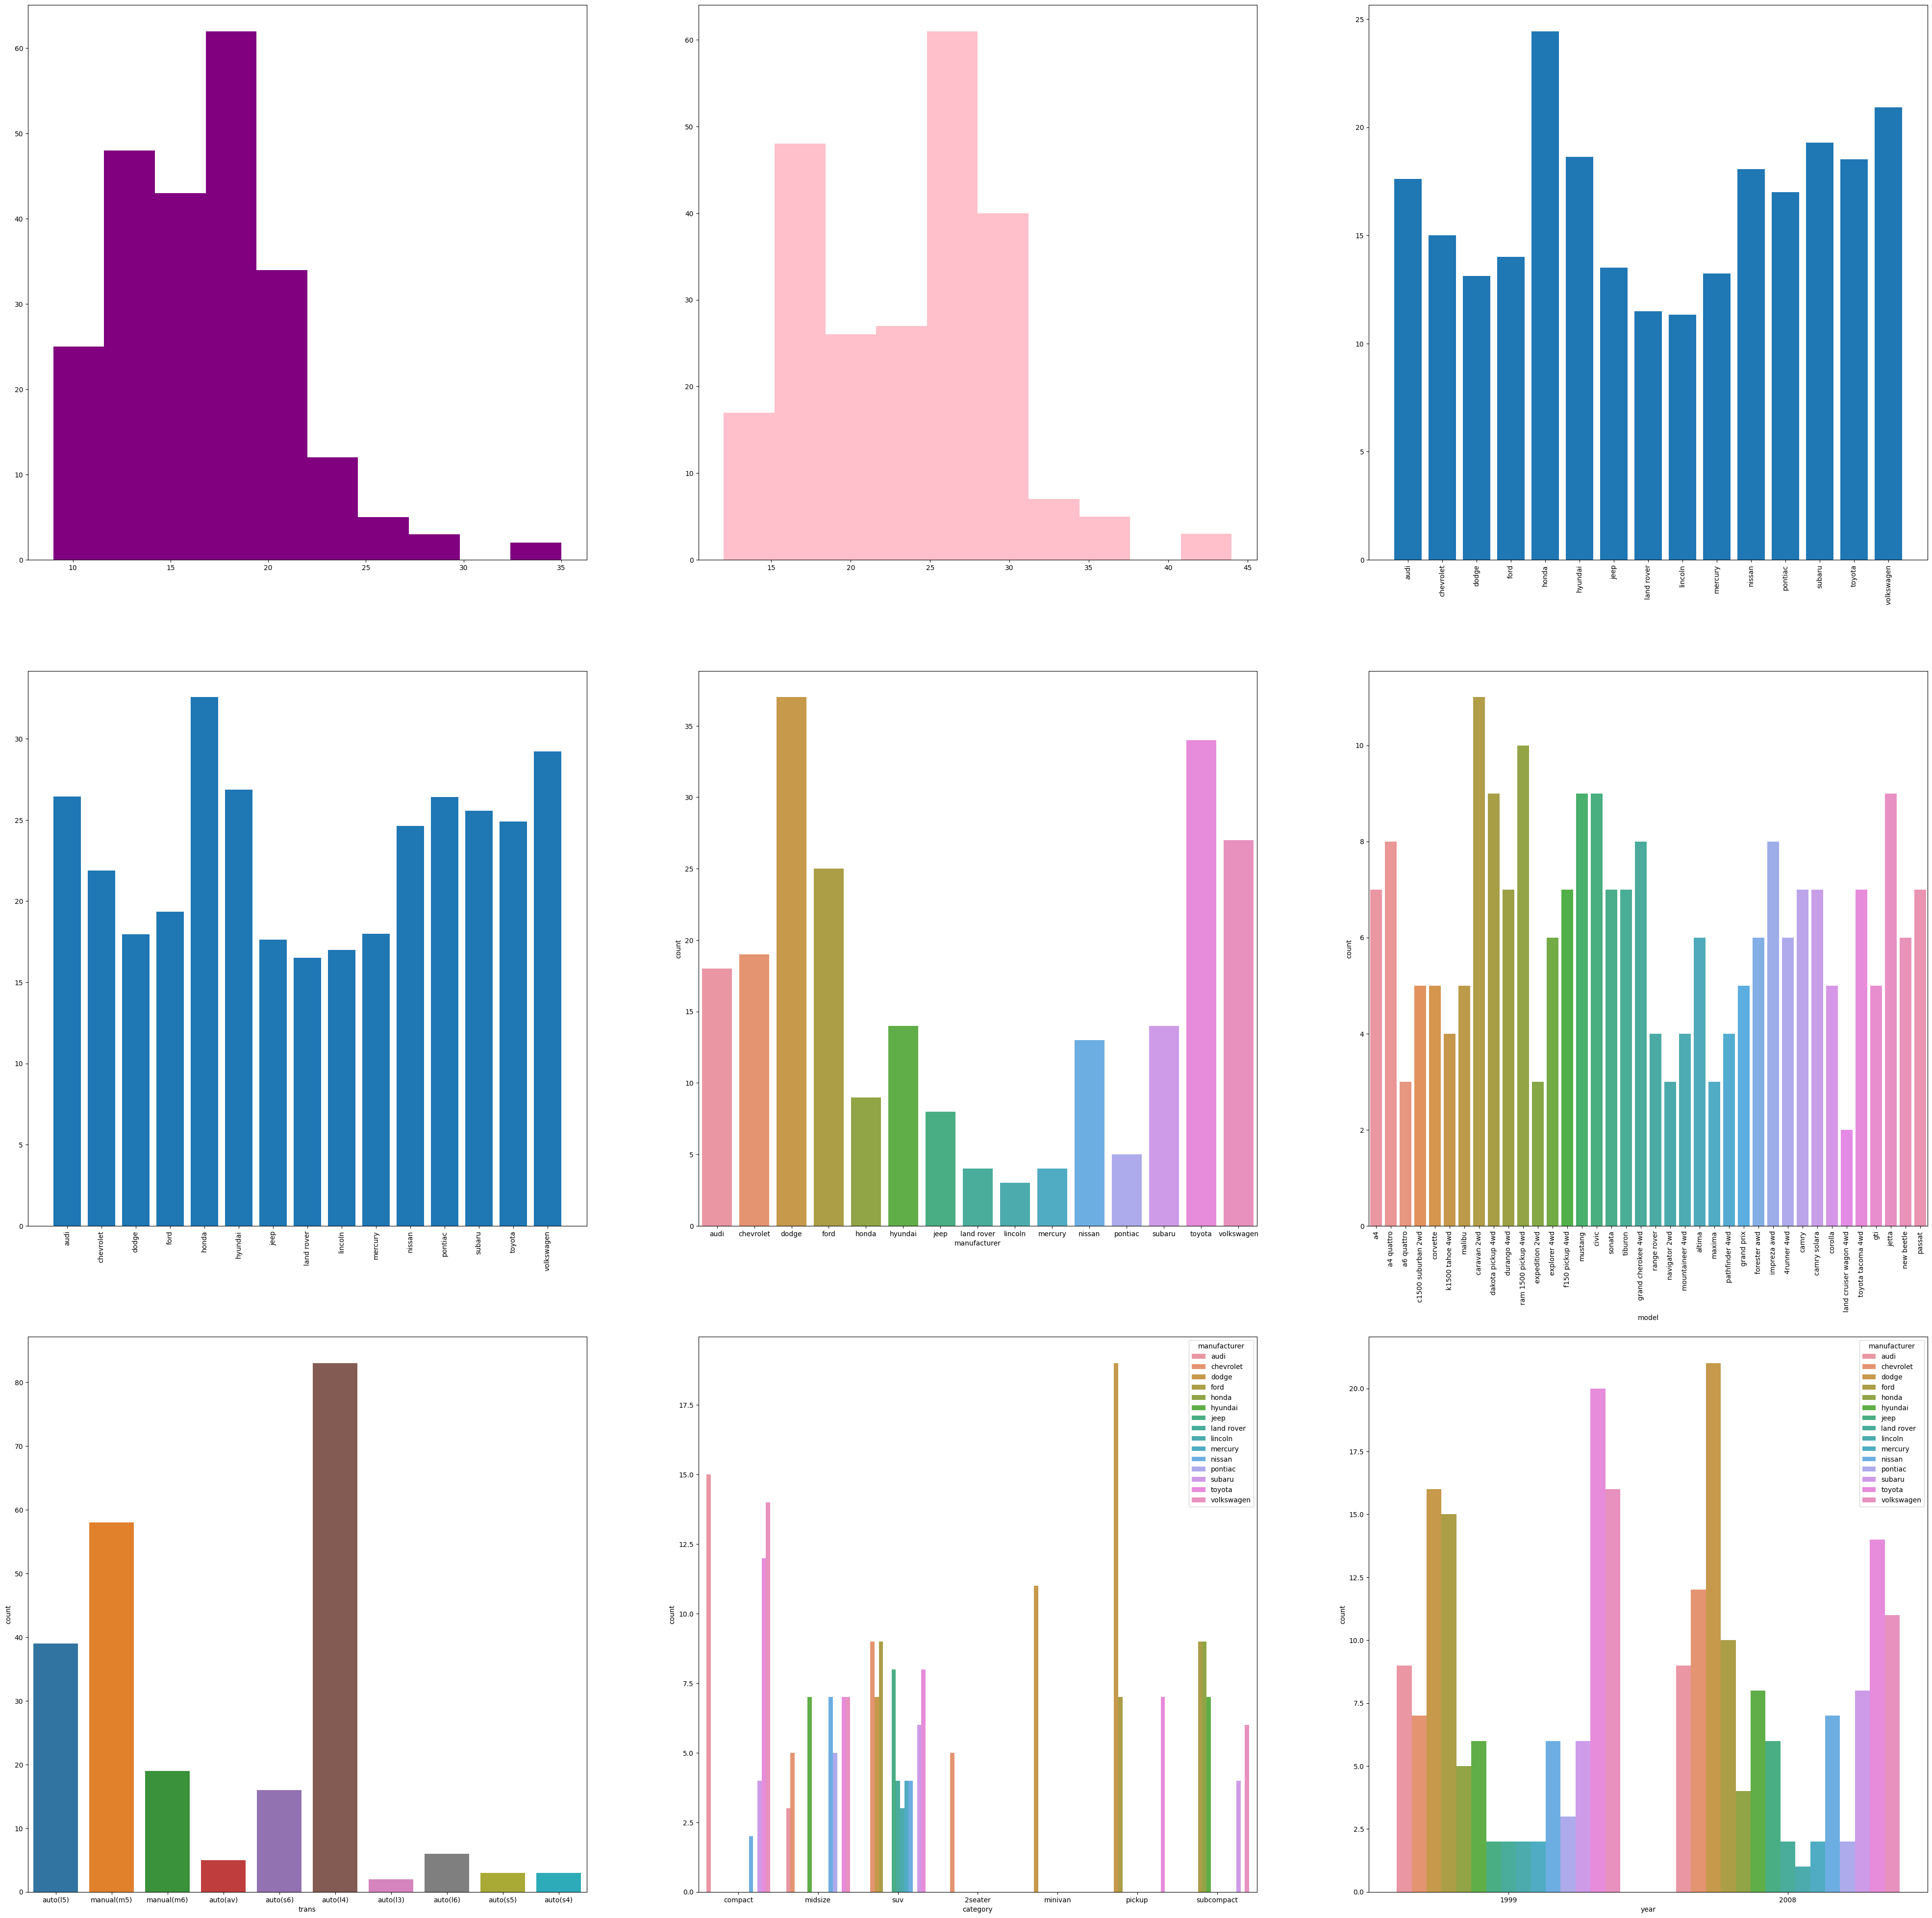

In [25]:
# subplot 사용해 그래프 여러 개 그리기
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(50,50))

ax[0,0].hist(mpg['cty'], facecolor='purple')
ax[0,1].hist(mpg['hwy'], facecolor='pink')
ax[0,2].set_xticklabels(manu_cty.index, rotation=90)
ax[0,2].bar(manu_cty.index, manu_cty['mean_cty'])
ax[1,0].set_xticklabels(manu_hwy.index, rotation=90)
ax[1,0].bar(manu_hwy.index, manu_hwy['mean_hwy'])
sns.countplot(x='manufacturer', data = mpg, ax = ax[1,1])
sns.countplot(x='model', data = mpg, ax = ax[1,2])
ax[1,2].set_xticklabels(ax[1, 2].get_xticklabels(), rotation=90)
sns.countplot(x='trans', data = mpg, ax = ax[2,0])
sns.countplot(x='category', hue='manufacturer', data = mpg, ax = ax[2,1])
sns.countplot(x='year', hue='manufacturer', data = mpg, ax = ax[2,2])

plt.show()

**2. 타이타닉 데이터 시각화**

In [3]:
# titanic 데이터 불러오기
import seaborn as sns
tit = sns.load_dataset('titanic')
tit

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


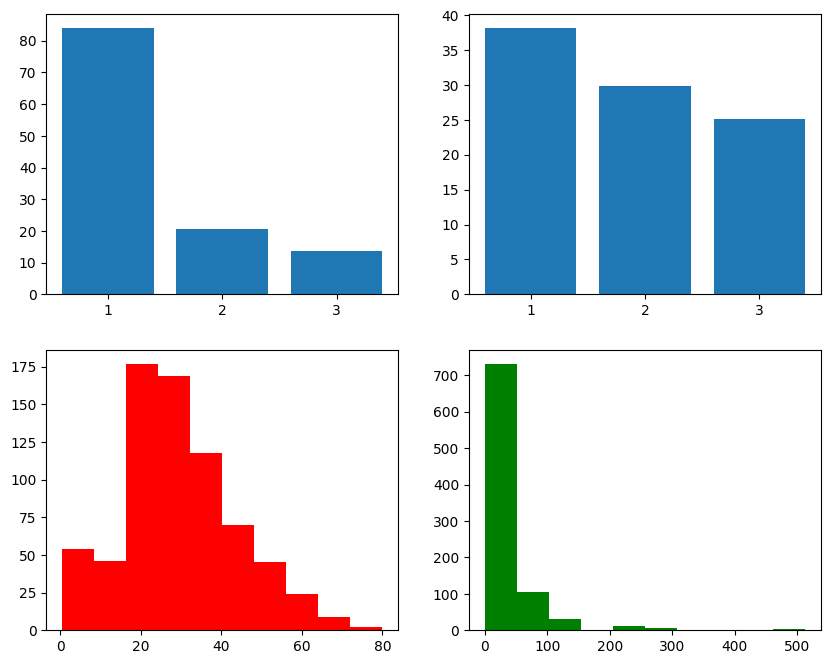

In [4]:
# 객실등급별 평균 요금 비교
class_fare = tit.groupby('pclass').agg(mean_fare=('fare','mean'))

# 객실등급별 평균 나이 비교
class_age = tit.groupby('pclass').agg(mean_age=('age','mean'))

# subplot 사용해 그래프 여러 개 그리기
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
ax[0,0].set_xticks([1,2,3])
ax[0,0].bar(class_fare.index, class_fare['mean_fare'])

ax[0,1].set_xticks([1,2,3])
ax[0,1].bar(class_age.index, class_age['mean_age'])

ax[1,0].hist(tit['age'], facecolor='red')
ax[1,1].hist(tit['fare'], facecolor='green')

plt.show()

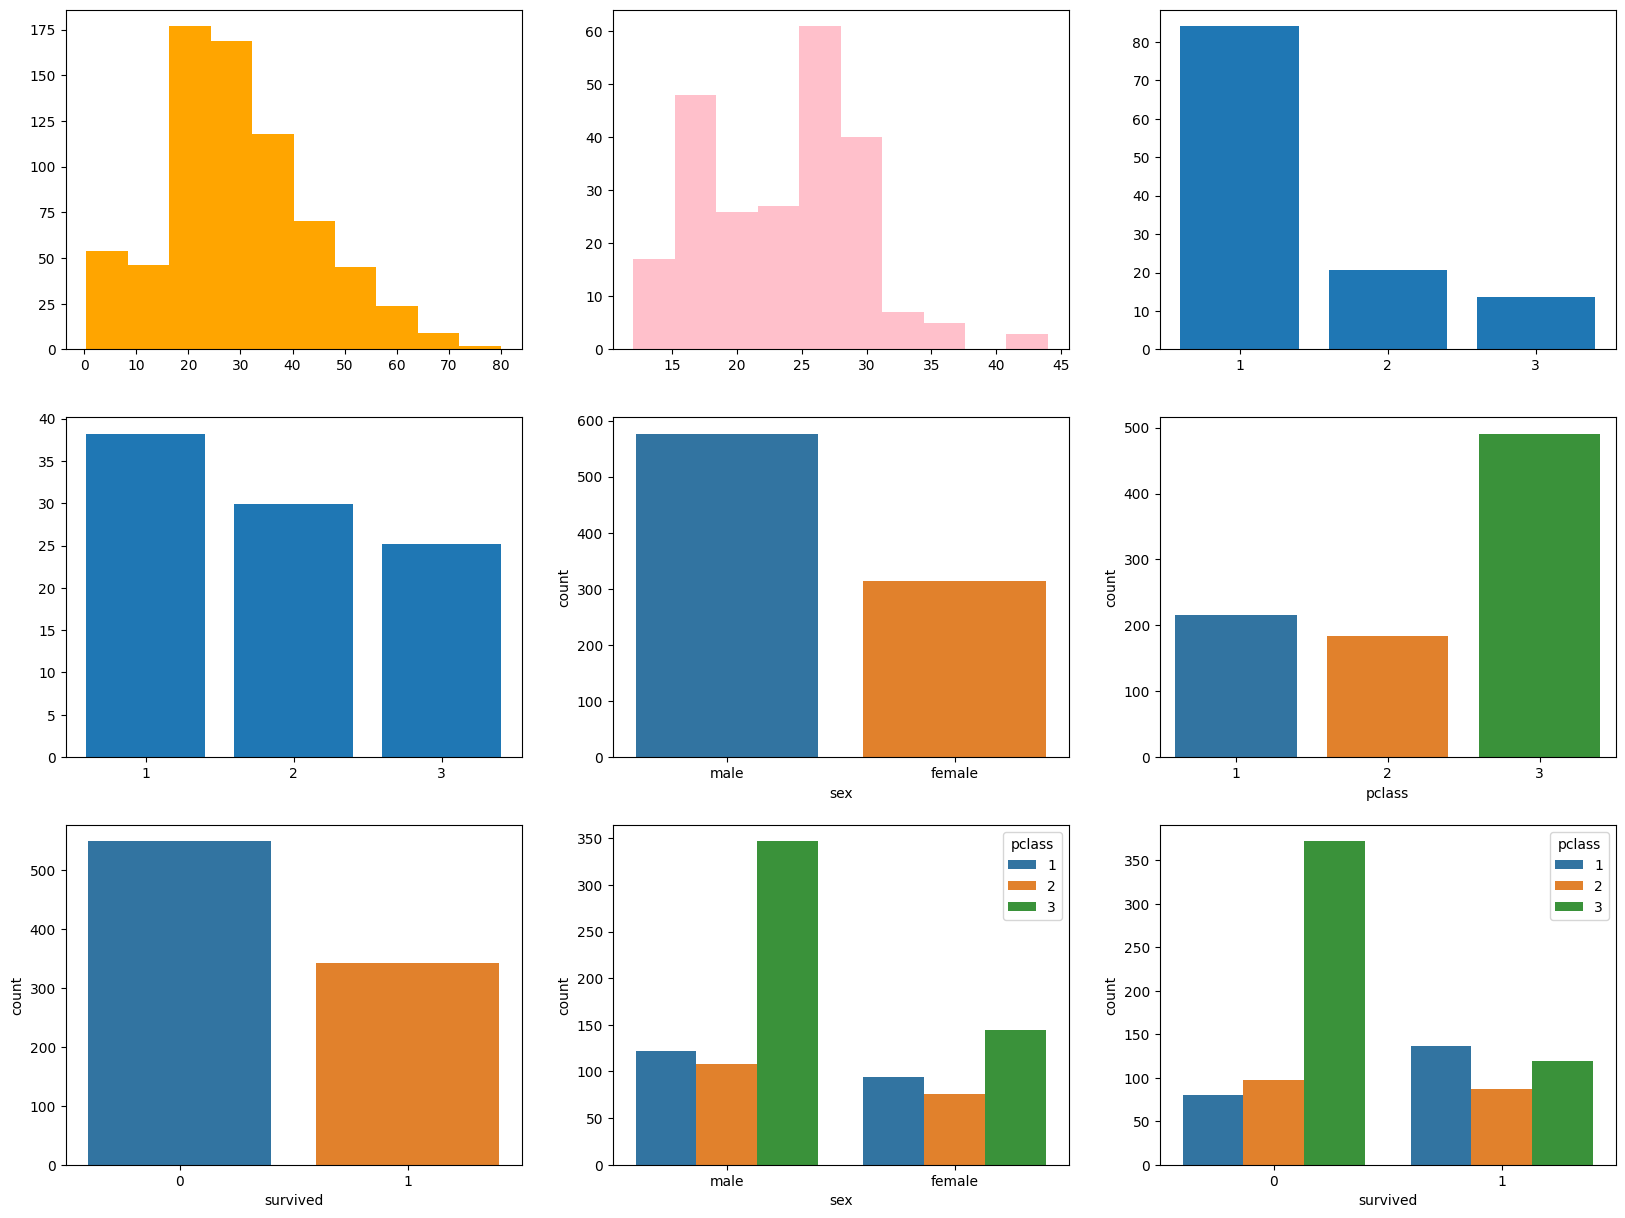

In [31]:
# subplot 사용해 그래프 여러 개 그리기
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20,15))

ax[0,0].hist(tit['age'], facecolor='orange')
ax[0,1].hist(mpg['hwy'], facecolor='pink')
ax[0,2].set_xticks([1,2,3])
ax[0,2].bar(class_fare.index, class_fare['mean_fare'])
ax[1,0].set_xticks([1,2,3])
ax[1,0].bar(class_age.index, class_age['mean_age'])
sns.countplot(x='sex', data = tit, ax = ax[1,1])
sns.countplot(x='pclass', data = tit, ax = ax[1,2])
sns.countplot(x='survived', data = tit, ax = ax[2,0])
sns.countplot(x='sex', hue='pclass', data = tit, ax = ax[2,1])
sns.countplot(x='survived', hue='pclass', data = tit, ax = ax[2,2])

plt.show()